In [9]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding


# In[2]:


#normal_data
normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

# attack_data
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [10]:
processed_normal.drop(processed_normal.iloc[:,0:20], inplace = True, axis = 1)
processed_normal.drop(['eth.type', 'ip.version', 'ip.ihl'], axis = 1, inplace = True)

In [12]:
processed_attack.drop(processed_attack.iloc[:,0:20], inplace = True, axis = 1)
processed_attack.drop(['eth.type', 'ip.version', 'ip.ihl'], axis = 1, inplace = True)

In [13]:
# In[3]:


from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=25, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)


# In[4]:


from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_dim=svd_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(20, activation='relu'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
model.save("svd_auto_removed_ip_5")

Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-18 20:30:01.798367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-18 20:30:01.798474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-18 20:30:01.879623: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 20:30:01.989946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 14s 4ms/step - loss: 0.3994
Epoch 2/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2798
Epoch 3/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.2604
Epoch 4/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.2499
Epoch 5/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.2454
Epoch 6/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2429
Epoch 7/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2407
Epoch 8/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.2368
Epoch 9/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.2333
Epoch 10/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2313
Epoch 11/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.2299
Epoch 12/20
3514/3514 [==============================] - 14s 4ms/step - loss: 0.2286


2022-03-18 20:34:33.736661: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


2022-03-18 20:35:41.585774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.47172905641407037
0.4744816936011024


<AxesSubplot:>

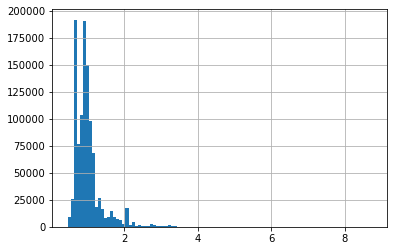

In [15]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# In[10]:


pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# In[12]:


pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

attack_df['score'] = score_list


# In[13]:


attack_df['score'].hist(bins = 100)

0.7930539992358732

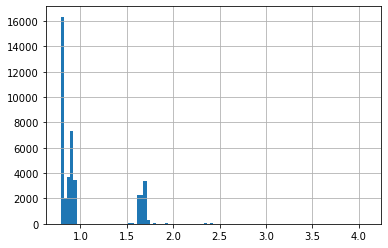

In [16]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].min()

<AxesSubplot:>

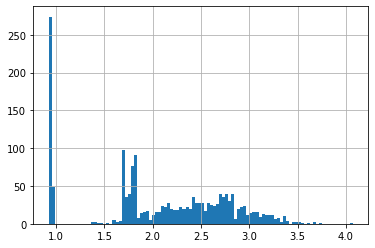

In [17]:

# In[21]:


normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[23]:


normal_wordpress['score'].hist(bins=100)

In [20]:
attack_df['score'].max()

8.73873119016337

In [22]:
nmap_df

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,score
1214,58,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,44,...,0,0,0,0,0,0,TCP,8443,50844,0.893616
1319,58,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,44,...,0,0,0,0,0,0,TCP,8080,51100,0.894520
1322,58,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,44,...,0,0,0,0,0,0,TCP,8443,51100,0.895227
1498,58,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,44,...,0,0,0,0,0,0,TCP,8443,51105,0.895259
1555,58,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,44,...,0,0,0,0,0,0,TCP,8443,51107,0.895273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061736,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,52,...,0,0,0,0,0,0,TCP,8080,42152,0.830306
1061751,581,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,567,...,3,1,2,0,3,2,TCP,8080,42248,1.661056
1061752,66,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,52,...,0,0,0,0,0,0,TCP,8080,42248,0.830764
1061764,581,1.647534e+09,6a:77:c0:85:72:c3,ba:c6:5f:04:4f:62,2048,10.244.0.15,89.100.107.148,4,6,567,...,3,1,2,0,3,2,TCP,8080,42106,1.660676
